# Bike Count Prediction Assignment

#### Problem Statement:

A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Importing libraries

In [1]:
# importing libraries for data opearion and visualisation
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data from the file
bike_rental = pd.read_csv('day.csv')

In [3]:
# Setting the column property to display all columns
pd.set_option('display.max_columns', None)

Dataset characteristics
=========================================	
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Data Understanding

In [4]:
# Analysis the the given dataset
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Analysis of the datatype of the given feature variables
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Inspecting the data set
bike_rental.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Shape of the dataset
bike_rental.shape

(730, 16)

## Data Analysis

- Checking for null values

In [8]:
# Checking for null values in data
bike_rental.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Data does not have have any <b>null or missing values</b>.

- Dropping the unwanted columns

In [9]:
# Dropping isntant column as it wont be rquired in the analysis
bike_rental.drop('instant', axis=1 , inplace=True)

##### Dropping the column dteday as we already have column for month and year

In [10]:
# Dropping the dteday column
bike_rental.drop(['dteday'], axis=1 , inplace=True)

##### Dropping the column 'casual' and 'registered' as our traget variable is cnt which is sum of casual and registered.

In [11]:
# Dropping the casual and regitered columns
bike_rental.drop(['casual','registered'], axis=1 , inplace=True)

##### Type casting the numeric attributes to category

In [12]:
#Type casting the attributes to category
var_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
bike_rental[var_cat]=bike_rental[var_cat].astype('category')

In [13]:
# Inspecting the datatype of data set
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [14]:
# Inspecting the data set
bike_rental.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


## Data Visualisation

##### Visual presentation of the all the categorical features against count 

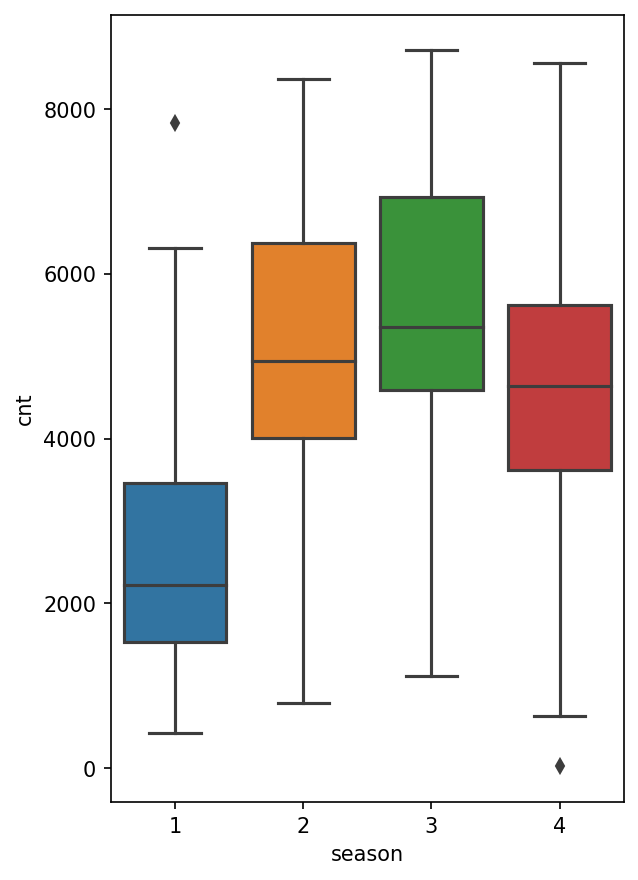

In [15]:
# plotting the bot plot for all the categorical features
plt.figure(figsize=(15, 15),dpi=150)
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_rental)

plt.show()

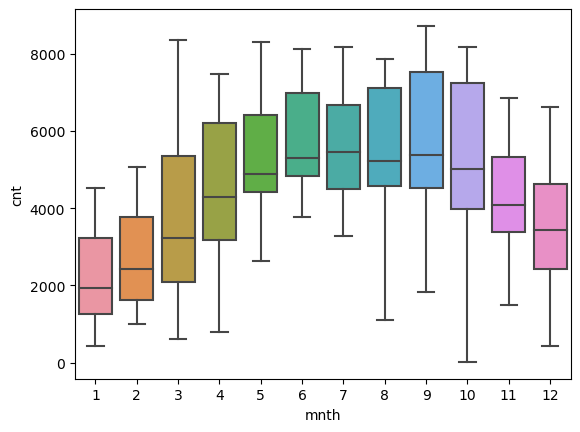

In [16]:
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_rental)
plt.show()

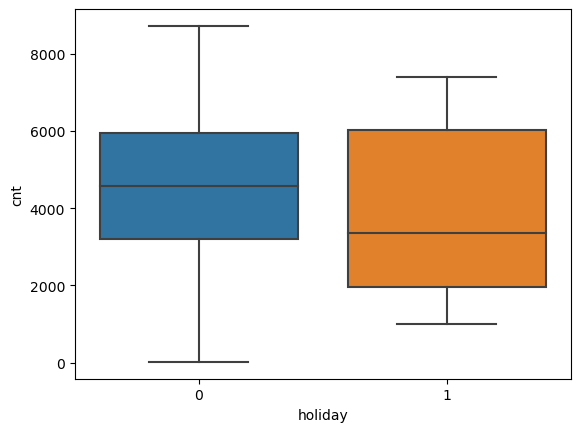

In [17]:
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_rental)
plt.show()

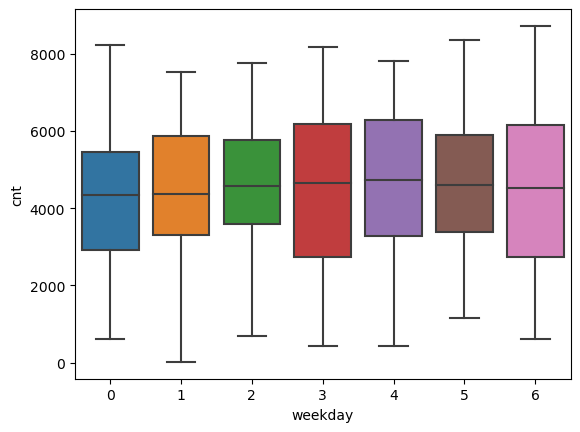

In [18]:
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_rental)
plt.show()

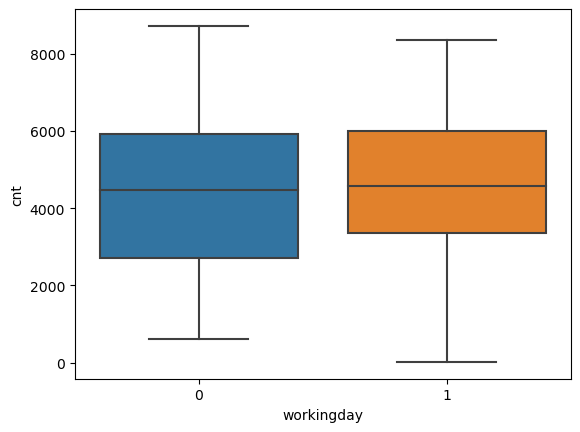

In [19]:
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_rental)
plt.show()

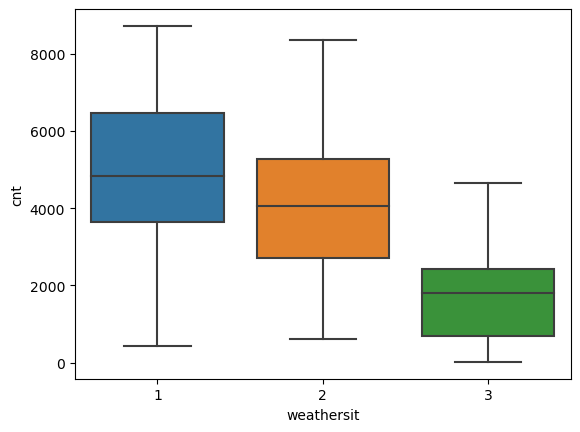

In [20]:
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_rental)
plt.show()

#### Inference: 
 - Maximum bike rental in season 3 which is <b>'Fall'</b> and specifically in month <b>September and October.</b>
 - On Holiday bike rental is comparatively less then <b>Non-Holiday</b> day
 - Wheather suitable for maximum bike rental is <b>"Clear, Few clouds, Partly cloudy, Partly cloudy".</b> ("No bike rental in Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog".)


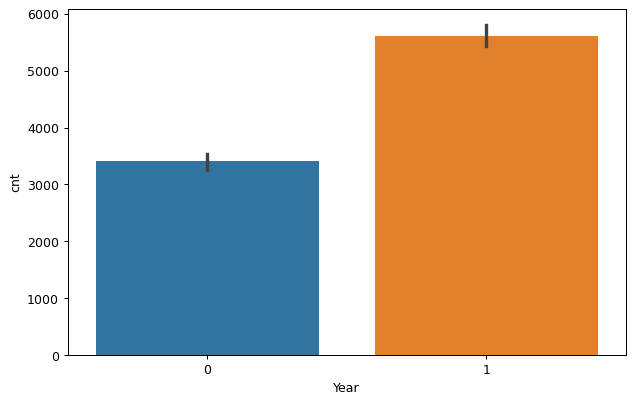

In [21]:
# Analysing and plotting for Year
plt.figure(figsize=[8,5],dpi=90)
sns.barplot(x=bike_rental.yr,y=bike_rental.cnt, data=bike_rental)
plt.xlabel('Year')
plt.show()

#### Inference: More bike rental in year 2019, represent trend.



#### Correlation between all numeric features

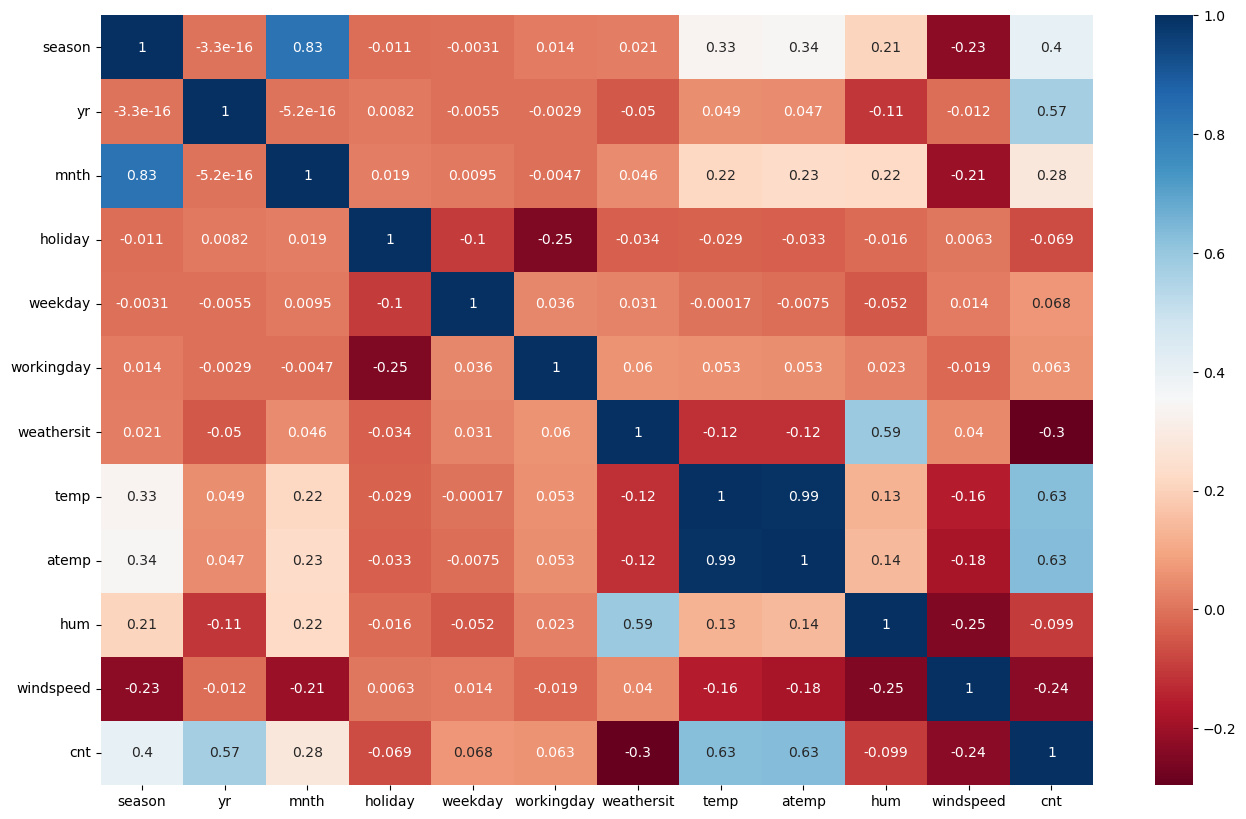

In [22]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_rental.corr(), annot = True, cmap="RdBu")
plt.show()

##### Visual presentation of the all numeric features

<Figure size 3750x4500 with 0 Axes>

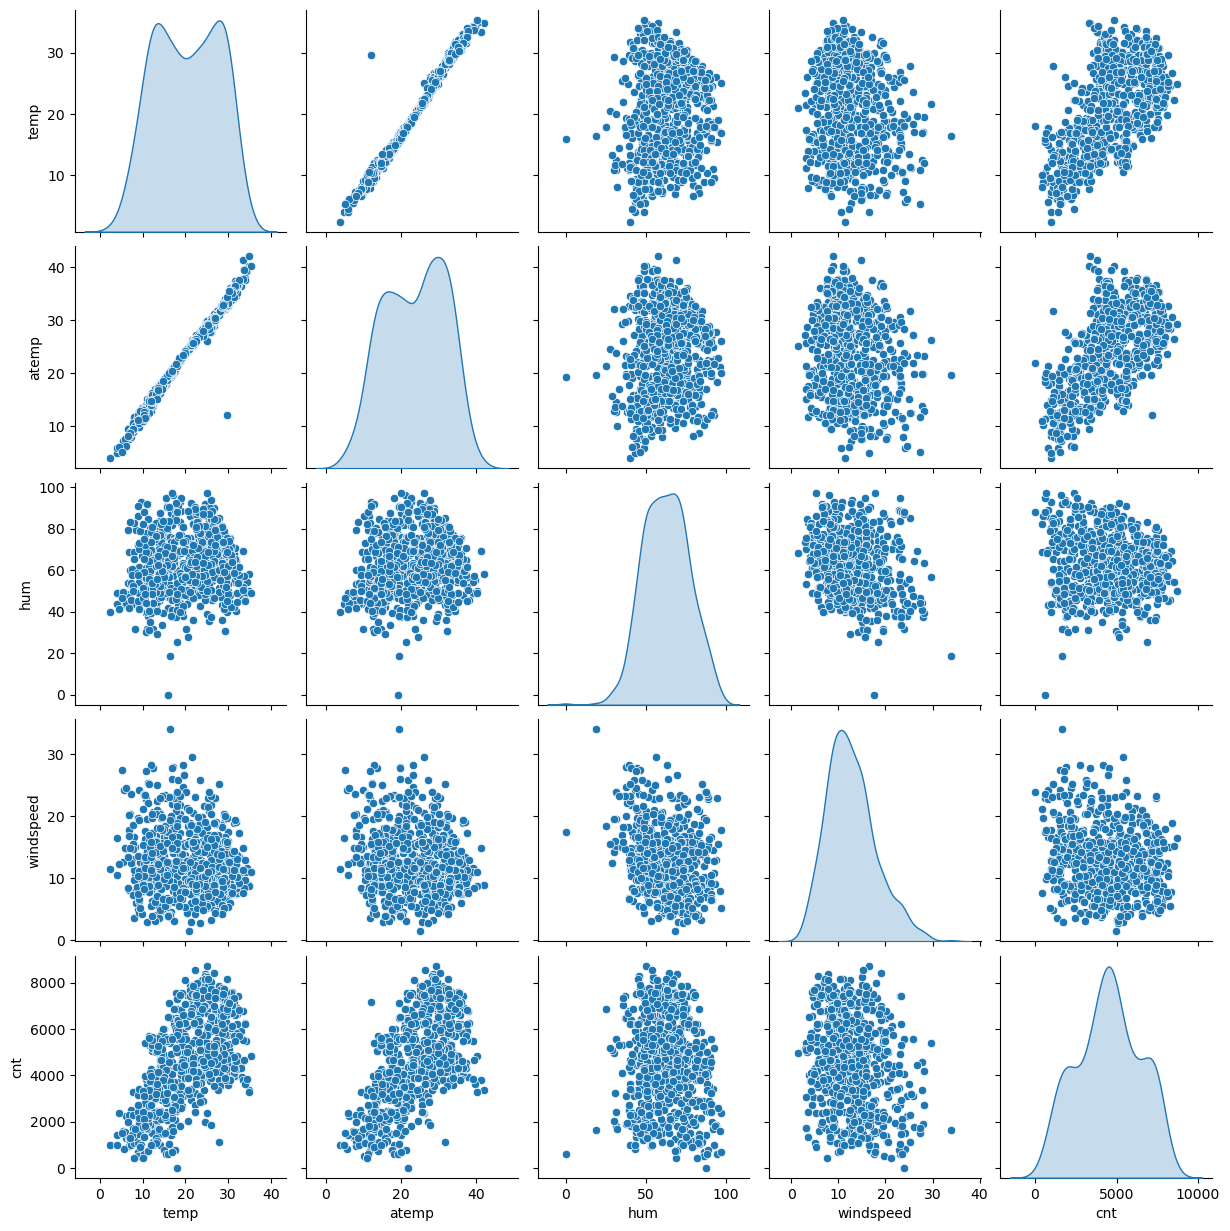

In [23]:
# Plotting the pair plot for all the numeric variables
plt.figure(figsize=(25, 30),dpi=150)
sns.pairplot(bike_rental,diag_kind='kde')
plt.show()

#### Inference: 
 - All the numeric features/variables are <b>Normally distributed</b>
 - High correlation between `temp` and `atemp`.
 - Linear relationship of `cnt` with `temp`
 - We have reverse correlation beween `cnt` and `hum/windspeed`

As there is high correlation between `temp` and `atemp`, we will drop `atemp`.

In [24]:
# Dropping the atemp colum
bike_rental.drop(['atemp'], axis=1 , inplace=True)

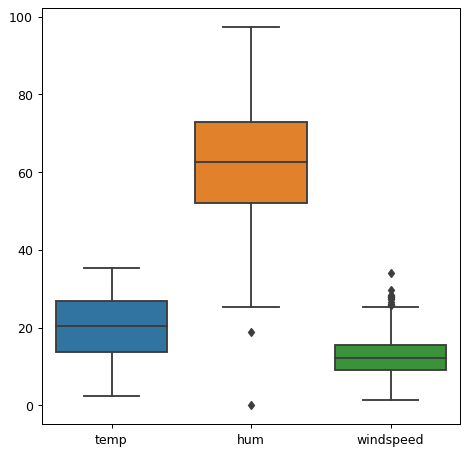

In [25]:
# plotting the bot plot for all the categorical features
plt.figure(figsize=(6, 6),dpi=90)
sns.boxplot(data=bike_rental[['temp','hum','windspeed']])
plt.show()

As observed by above box plot Humidity and windspeed has some outliers

### Outlier Treatment

In [26]:
# Method for outlier treatment
def outlier_treatment(col):
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(bike_rental[col], [75 ,25])
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    #Replace with NA
    bike_rental.loc[bike_rental[col] < minimum,col] = np.nan
    bike_rental.loc[bike_rental[col] > maximum,col] = np.nan

In [27]:
# Outlier treatment for hum and windspeed columns
outlier_treatment('hum')
outlier_treatment('windspeed')

In [28]:
# Checking for null values
bike_rental.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
hum            2
windspeed     13
cnt            0
dtype: int64

In [29]:
# Imputing the null values with mean value
bike_rental['windspeed']=bike_rental['windspeed'].fillna(bike_rental['windspeed'].mean())
bike_rental['hum']=bike_rental['hum'].fillna(bike_rental['hum'].mean())

## Data Preparation

### Dummy Variables
- We will be creating dummy variables for categorical variable which are not binomial

In [30]:
# Get the dummy variables for the categorical feature and store it in a new variable - 'status'
var_cat = ['season','mnth','weekday','workingday','weathersit']
status = pd.get_dummies(bike_rental[var_cat], drop_first=True)

In [31]:
# Inspecting the datatype of the status data set
status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   season_2      730 non-null    bool 
 1   season_3      730 non-null    bool 
 2   season_4      730 non-null    bool 
 3   mnth_2        730 non-null    bool 
 4   mnth_3        730 non-null    bool 
 5   mnth_4        730 non-null    bool 
 6   mnth_5        730 non-null    bool 
 7   mnth_6        730 non-null    bool 
 8   mnth_7        730 non-null    bool 
 9   mnth_8        730 non-null    bool 
 10  mnth_9        730 non-null    bool 
 11  mnth_10       730 non-null    bool 
 12  mnth_11       730 non-null    bool 
 13  mnth_12       730 non-null    bool 
 14  weekday_1     730 non-null    bool 
 15  weekday_2     730 non-null    bool 
 16  weekday_3     730 non-null    bool 
 17  weekday_4     730 non-null    bool 
 18  weekday_5     730 non-null    bool 
 19  weekday_6     730 non-null   

In [32]:
# Add the results to the original bike_rental dataframe
bike_rental = pd.concat([bike_rental, status], axis = 1)

In [33]:
# Dropping the the original column after creating dummy variables
bike_rental.drop(var_cat,inplace=True,axis=1)

In [34]:
# Inspecting the dataset
bike_rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   yr            730 non-null    category
 1   holiday       730 non-null    category
 2   temp          730 non-null    float64 
 3   hum           730 non-null    float64 
 4   windspeed     730 non-null    float64 
 5   cnt           730 non-null    int64   
 6   season_2      730 non-null    bool    
 7   season_3      730 non-null    bool    
 8   season_4      730 non-null    bool    
 9   mnth_2        730 non-null    bool    
 10  mnth_3        730 non-null    bool    
 11  mnth_4        730 non-null    bool    
 12  mnth_5        730 non-null    bool    
 13  mnth_6        730 non-null    bool    
 14  mnth_7        730 non-null    bool    
 15  mnth_8        730 non-null    bool    
 16  mnth_9        730 non-null    bool    
 17  mnth_10       730 non-null    bool    
 18  mnth_11   

## Tesing the Data into Training and Testing Sets

In [35]:
# Importing train test split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_rental, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [36]:
# Importing MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [37]:
# Scaling the feature
scaler = MinMaxScaler()

In [38]:
# Inspecting the train data set
df_train.describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,20.102429,63.322792,12.498555,4486.382353
std,7.431169,13.736133,4.782284,1952.158739
min,2.424346,27.583300,2.834381,22.000000
25%,13.606865,52.427100,9.041918,3120.000000
50%,20.209597,63.437500,12.083182,4530.000000
75%,26.615847,73.250025,15.458575,5973.500000
max,35.328347,97.041700,25.333236,8714.000000


In [39]:
# Apply scaler() to all the columns except binomial and dummy variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [40]:
# inspecting the train data
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
653,1,0,0.509887,0.406718,0.416662,0.864243,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
576,1,0,0.815169,0.616677,0.366645,0.827658,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False
426,1,0,0.442393,0.497301,0.353703,0.465255,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
728,1,0,0.245101,0.298740,0.918542,0.204096,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
482,1,0,0.395666,0.307738,0.261077,0.482973,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [41]:
# Inspecting the train data set
df_train.describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.514545,0.429541,0.513620
std,0.225844,0.197761,0.212557,0.224593
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.357679,0.275905,0.356420
50%,0.540519,0.516197,0.411079,0.518638
75%,0.735215,0.657469,0.561104,0.684710
max,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [42]:
# Dividing the target and feature variables
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model

### RFE
Recursive feature elimination <br>
We will be using RFE for selecting the feature

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
# RFE supported features
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [50]:
# RFE not supported features
X_train.columns[~rfe.support_]

Index(['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5'],
      dtype='object')

In [51]:
# RFE support and not supported features with ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 6),
 ('mnth_3', False, 3),
 ('mnth_4', False, 4),
 ('mnth_5', False, 2),
 ('mnth_6', False, 5),
 ('mnth_7', False, 8),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 11),
 ('weekday_1', False, 7),
 ('weekday_2', False, 9),
 ('weekday_3', False, 13),
 ('weekday_4', False, 14),
 ('weekday_5', False, 12),
 ('weekday_6', True, 1),
 ('workingday_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

### Building model using statsmodel, for the detailed statistics

#### Model 1

In [52]:
# Creating X_test with RFE supported features
X_train_rfe = X_train[col]

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
print(X_train_rfe)

     const yr holiday      temp       hum  windspeed  season_2  season_3  \
653    1.0  1       0  0.509887  0.406718   0.416662     False     False   
576    1.0  1       0  0.815169  0.616677   0.366645     False      True   
426    1.0  1       0  0.442393  0.497301   0.353703     False     False   
728    1.0  1       0  0.245101  0.298740   0.918542     False     False   
482    1.0  1       0  0.395666  0.307738   0.261077      True     False   
..     ... ..     ...       ...       ...        ...       ...       ...   
526    1.0  1       0  0.824514  0.449311   0.492576      True     False   
578    1.0  1       0  0.863973  0.552489   0.259228     False      True   
53     1.0  0       0  0.202618  0.211940   0.154283     False     False   
350    1.0  0       0  0.248216  0.410318   0.598155     False     False   
79     1.0  0       0  0.462664  0.664510   0.733996      True     False   

     season_4  mnth_8  mnth_9  mnth_10  weekday_6  workingday_1  weathersit_2  \
653   

In [61]:
lr_1 = sm.OLS(y_train,X_train_rfe.astype(float)).fit()   # Running the linear model

In [62]:
#Let's see the summary of our linear model
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.9
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.50e-187
Time:                        23:31:18   Log-Likelihood:                 510.78
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     494   BIC:                            -921.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1347      0.023      5.932   

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.23
7,season_3,6.09
3,temp,3.79
6,season_2,2.61
8,season_4,2.15
4,hum,2.06
13,workingday_1,1.88
12,weekday_6,1.78
9,mnth_8,1.69
14,weathersit_2,1.66


#### Model 2

season_3 is insignificant in presence of other variables; can be dropped

In [64]:
X_train_new = X_train_rfe.drop(["season_3"], axis = 1)

In [65]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [67]:
# Running the linear model
lr_2 = sm.OLS(y_train,X_train_lm.astype(float)).fit()   

In [102]:
#Let's see the summary of our linear model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.6
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.34e-179
Time:                        23:16:10   Log-Likelihood:                 489.09
No. Observations:                 510   AIC:                            -948.2
Df Residuals:                     495   BIC:                            -884.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1844      0.021      8.725   

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.07
4,hum,2.00
12,workingday_1,1.88
11,weekday_6,1.78
7,season_4,1.71
13,weathersit_2,1.64
3,temp,1.59
10,mnth_10,1.49
8,mnth_8,1.46
6,season_2,1.38


#### Model 3

- Dropping the `holiday` as it has high p-value, we are only considering the most significant features

In [70]:
# Dropping the holiday column
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [71]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [73]:
# Running the linear model
lr_3 = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [74]:
#Let's see the summary of our linear model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.41e-188
Time:                        23:32:11   Log-Likelihood:                 507.72
No. Observations:                 510   AIC:                            -987.4
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1236      0.022      5.544   

In [76]:
# Calculate the VIFs for the new model


vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.83
3,hum,2.00
6,season_4,1.71
11,workingday_1,1.65
10,weekday_6,1.64
12,weathersit_2,1.64
2,temp,1.59
9,mnth_10,1.49
7,mnth_8,1.46
5,season_2,1.38


#### Model 4

- Dropping the `mnth_10` as it has high p-value, we are only considering the most significant features

In [77]:
# Dropping the mnth_10 column
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [78]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [80]:
# Running the linear model
lr_4 = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [82]:
#Let's see the summary of our linear model
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.1
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          8.33e-189
Time:                        23:32:53   Log-Likelihood:                 505.46
No. Observations:                 510   AIC:                            -984.9
Df Residuals:                     497   BIC:                            -929.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1194      0.022      5.359   

In [83]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.58
3,hum,2.00
10,workingday_1,1.65
9,weekday_6,1.64
11,weathersit_2,1.64
2,temp,1.54
7,mnth_8,1.44
5,season_2,1.37
12,weathersit_3,1.35
6,season_4,1.31


#### Model 5

- Dropping the `mnth_8` for its p-value, as we are having multipe feature and we want to keep our model simple. <br> We are only considering p-value which are <b>zero</b>

In [84]:
# Dropping the mnth_8 column
X_train_new = X_train_new.drop(["mnth_8"], axis = 1)

In [85]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [86]:
# Running the linear model
lr_5 = sm.OLS(y_train,X_train_lm.astype(float)).fit()

In [87]:
#Let's see the summary of our linear model
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.3
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.11e-187
Time:                        23:33:22   Log-Likelihood:                 499.97
No. Observations:                 510   AIC:                            -975.9
Df Residuals:                     498   BIC:                            -925.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1122      0.022      5.012   

In [88]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.29
3,hum,2.00
9,workingday_1,1.65
8,weekday_6,1.64
10,weathersit_2,1.63
11,weathersit_3,1.35
2,temp,1.27
6,season_4,1.25
5,season_2,1.19
4,windspeed,1.17


In [89]:
# Dropping the const in the train set
X_train_new = X_train_new.drop(['const'], axis=1)

## Residual Analysis of the train data
- To check if the error terms are also normally distributed

In [90]:
# predict y train value using the trained model
y_train_cnt = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

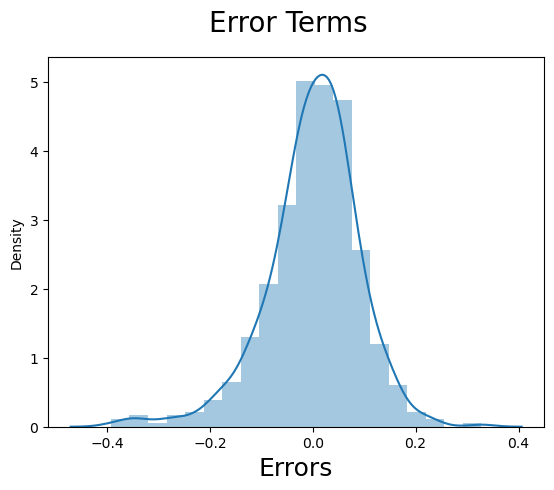

In [91]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

## Making Predictions

In [92]:
# Transformating the numeric values
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [93]:
# Inspecting the test data
df_test.describe()

,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.494952,0.427802,0.520592
std,0.233698,0.208134,0.211683,0.218435
min,0.046591,-0.031193,-0.059298,0.048205
25%,0.354650,0.339533,0.274987,0.377531
50%,0.558691,0.479905,0.414813,0.524275
75%,0.759096,0.642237,0.551854,0.672745
max,0.984424,1.002999,0.988907,0.963300


In [94]:
# splitting X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   yr            219 non-null    category
 1   holiday       219 non-null    category
 2   temp          219 non-null    float64 
 3   hum           219 non-null    float64 
 4   windspeed     219 non-null    float64 
 5   season_2      219 non-null    bool    
 6   season_3      219 non-null    bool    
 7   season_4      219 non-null    bool    
 8   mnth_2        219 non-null    bool    
 9   mnth_3        219 non-null    bool    
 10  mnth_4        219 non-null    bool    
 11  mnth_5        219 non-null    bool    
 12  mnth_6        219 non-null    bool    
 13  mnth_7        219 non-null    bool    
 14  mnth_8        219 non-null    bool    
 15  mnth_9        219 non-null    bool    
 16  mnth_10       219 non-null    bool    
 17  mnth_11       219 non-null    bool    
 18  mnth_12       

In [95]:
#Selecting the variables that were part of final model.
col1 = X_train_new.columns
X_test = X_test[col1]

In [96]:
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   const         219 non-null    float64 
 1   yr            219 non-null    category
 2   temp          219 non-null    float64 
 3   hum           219 non-null    float64 
 4   windspeed     219 non-null    float64 
 5   season_2      219 non-null    bool    
 6   season_4      219 non-null    bool    
 7   mnth_9        219 non-null    bool    
 8   weekday_6     219 non-null    bool    
 9   workingday_1  219 non-null    bool    
 10  weathersit_2  219 non-null    bool    
 11  weathersit_3  219 non-null    bool    
dtypes: bool(7), category(1), float64(4)
memory usage: 10.4 KB


In [97]:
# Making predictions using the final model (lr6)

y_pred = lr_5.predict(X_test_lm4)

Text(0, 0.5, 'y_pred')

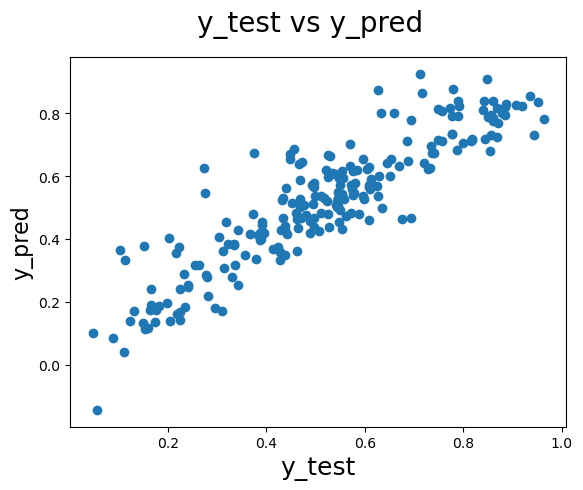

In [98]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

#### R-squared value for test

In [99]:
#checking r-squared value for test set
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.807710746684789

#### Adjusted R-squared value for test

In [100]:
# R-squared for test
r2 = r2_score(y_test, y_pred)

#Shape of test data
X_test.shape

(219, 11)

In [101]:
# n is number of elements in rows and p is number of features (columns)
n = X_test.shape[0]
p = X_test.shape[1]

# Adjusted R-squared using below formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7974924771849469

### Result Summary

`R2 Squared` value for train set : <b>0.836</b> <br>
`Adjusted R2 Squared` value for train set : <b>0.833</b> <br>
`R2 Squared value` for test set : <b>0.807</b> <br>
`Adjusted R2 Squared` value for test set : <b>0.797</b> <br>

The model build has very close value for R-Squared for train and test set, hence we can conclude our model if <b>good</b> at <b>generalizing</b> test set

### Interpretation of the model

The variables which are significant in predicting the demand for shared bikes are:<br>

Demand will <b>increase</b> if below variable value increase <br>
- `temp` (<b>Temperature</b> has co-efficient of <b>0.5788</b> meaning demand in bike rental will increase by 0.5788 if there is an increase of 1 unit of temperature).
- `yr` ( <b>Year</b> has co-efficient of <b>0.2277</b> meaning demand in bike rental increase by 0.2277 if there is a year change, This shows increase trend by year)
- `season` (Demand in `summer` and `winter` will increase by 0.0887 and 0.1419 in those seasons).
- `mnth_9` (Demand will increase in month of <b>September</b> by 0.1038).

Demand will <b>decrease</b> if below variable value increase <br>
- <b>`weathersit_3`</b> ( weathersit_3 has co-efficient of <b>-0.2364</b> meaning bike rental demand will decrease by 0.2364 in weather condition of `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds`).
- <b>`hum`</b> ( hum has co-efficient of <b>-0.1166</b> meaning bike rental demand will decrease by 0.1166  if there increase of 1 unit of `humidity`).
- <b>`windspeed`</b> ( windspeed has co-efficient of <b>-0.1197</b> meaning bike rental demand will decrease by 0.1197 if there increase of 1 unit of `windspeed`).